In [1]:
import importlib
import imageio.v2 as imageio
from patient import patient
import glob
import cupy as cp
from xray import xray

p = patient.patient(
    # name="4404151",
    name="4409573",
    # name="4411423",
    # name="4411557",
    do={'ct': False, 'drr': False, 'posdrr': False, 'fbp': False,
        'posfbp': False, 'resize': False},
    skip_done=False
)

# xrayset = xray.xrayset(
    
#         name="__phantom",
#         sheets=450,
#         voltage=120,
#         height=1024,
#         output_height=500
#     )

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mlp
import scipy.stats as stats
import cupy as cp

rc('text', usetex=True)
mlp.use('pgf')
mlp.rc('font', family='Noto Serif CJK JP')
# mlp.rcParams['Hiragino Sans']
# plt.rcParams['text.usetex'] = True

from matplotlib.ticker import PercentFormatter

def plot_hist(img, **kwargs):
    plt.hist(cp.asnumpy(img).ravel(), bins=64, range=(0, 256), density=True, **kwargs)
    # plt.hist(cp.asnumpy(img).ravel(), bins=64, range=(0, 256), alpha=0.3, density=True, **kwargs)

fig = plt.figure(figsize=(4, 3), dpi=360)

# plt.ylim(0, 0.02)
# plt.xlim(0, 256)
# plot_hist(xrayset.img[0], color='black', label="x")
# plt.savefig("figs/graph/xray_histogram.png")
# plt.cla()

plt.ylim(0, 0.02)
plt.xlim(0, 256)
plot_hist(p.posdrr.img[0], color='C0', label="調整前DRR", alpha=0.7)
plt.legend()
plt.savefig("figs/graph/unadjusted_drr_histogram.png")
plt.cla()

plt.ylim(0, 0.02)
plt.xlim(0, 256)
plot_hist(p.drr.img[0], color='C0', label="調整後DRR", alpha=0.7)
plot_hist(xrayset.img[0], color='black', label="X線画像", linewidth=0.8,  histtype=u'step')
plt.legend()
plt.savefig("figs/graph/adjusted_drr_histogram.png")
plt.cla()

# # plt.hist(cp.asnumpy(p.posdrr.img[0]).ravel(), bins=256, range=(0.0, 256))
# plt.savefig("figs/graph/xray_histogram.png")
# plt.cla()

NameError: name 'xrayset' is not defined

### adjusted vs unadjusted fbp

In [85]:
imageio.imsave("figs/fbp/unadjusted.png", cp.asnumpy(p.posfbp.get(150)))
imageio.imsave("figs/fbp/adjusted.png", cp.asnumpy(p.fbp.get(150)))

81276

## registeration

In [3]:
import importlib
importlib.reload(patient)

import cv2

b = 150

imageio.imsave("figs/registeration/ct.png", cp.asnumpy(p.ct.img[b]))
imageio.imsave("figs/registeration/fbp.png", cp.asnumpy(p.get_resized_fbp(b, pos=True)))

img1 = imageio.imread("figs/registeration/ct.png")
img2 = imageio.imread("figs/registeration/fbp.png")

img2 = cp.asnumpy(p.hist_match(img2, cp.asnumpy(p.ct.img[b])))
imageio.imsave("figs/registeration/fbp_adjusted.png", img2)

imageio.imsave("figs/registeration/diff.png", img1 - img2)

Lossy conversion from int16 to uint8. Range [1, 235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 216.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-162.0, 182.5819209039548]. Convert image to uint8 prior to saving to suppress this warning.


## position & resize graphs

12.0338089015493
133


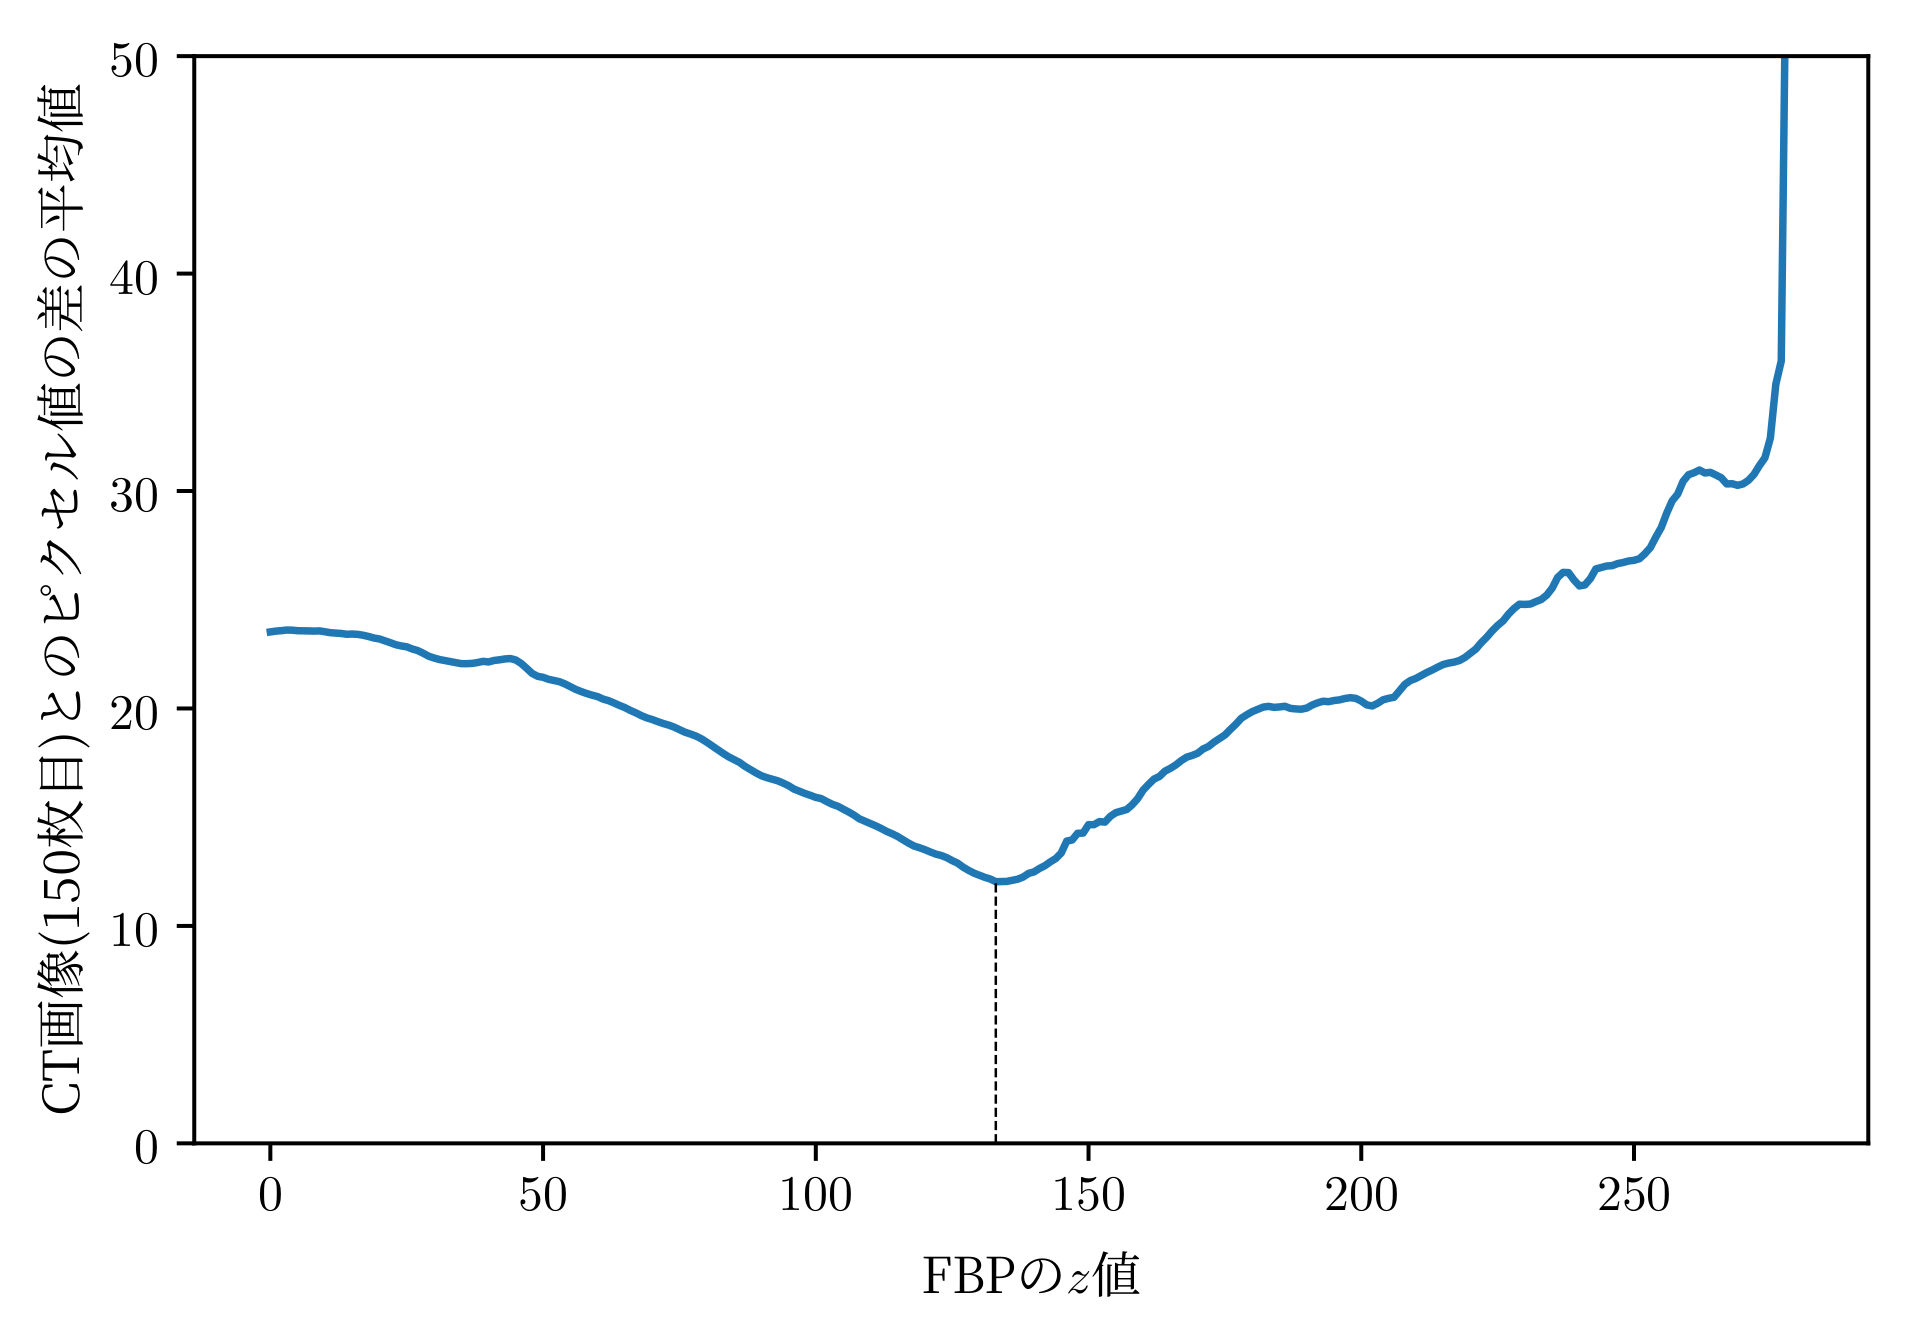

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mlp
import scipy.stats as stats
import cupy as cp

dat = p.get_equiv_data(b)

dat = np.flip(dat)
print(dat[133])
print(np.argmin(dat))

fig = plt.figure(figsize=(6, 4), dpi=360)

rc('text', usetex=True)
mlp.use('pgf')
mlp.rc('font', family='Noto Serif CJK JP')

plt.plot(dat)
plt.vlines(x=133, color='black', linestyle='dashed', linewidth=0.5, ymax=12, ymin=0)

plt.ylim(0, 50)
plt.xlabel(r"FBPの$z$値")
plt.ylabel("CT画像(150枚目)とのピクセル値の差の平均値")

plt.savefig("figs/graph/position.png")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mlp
import scipy.stats as stats
import cupy as cp

x, y = p.calculate_resize_data(b)

Resize:   0%|          | 0/50 [00:00<?, ?it/s]

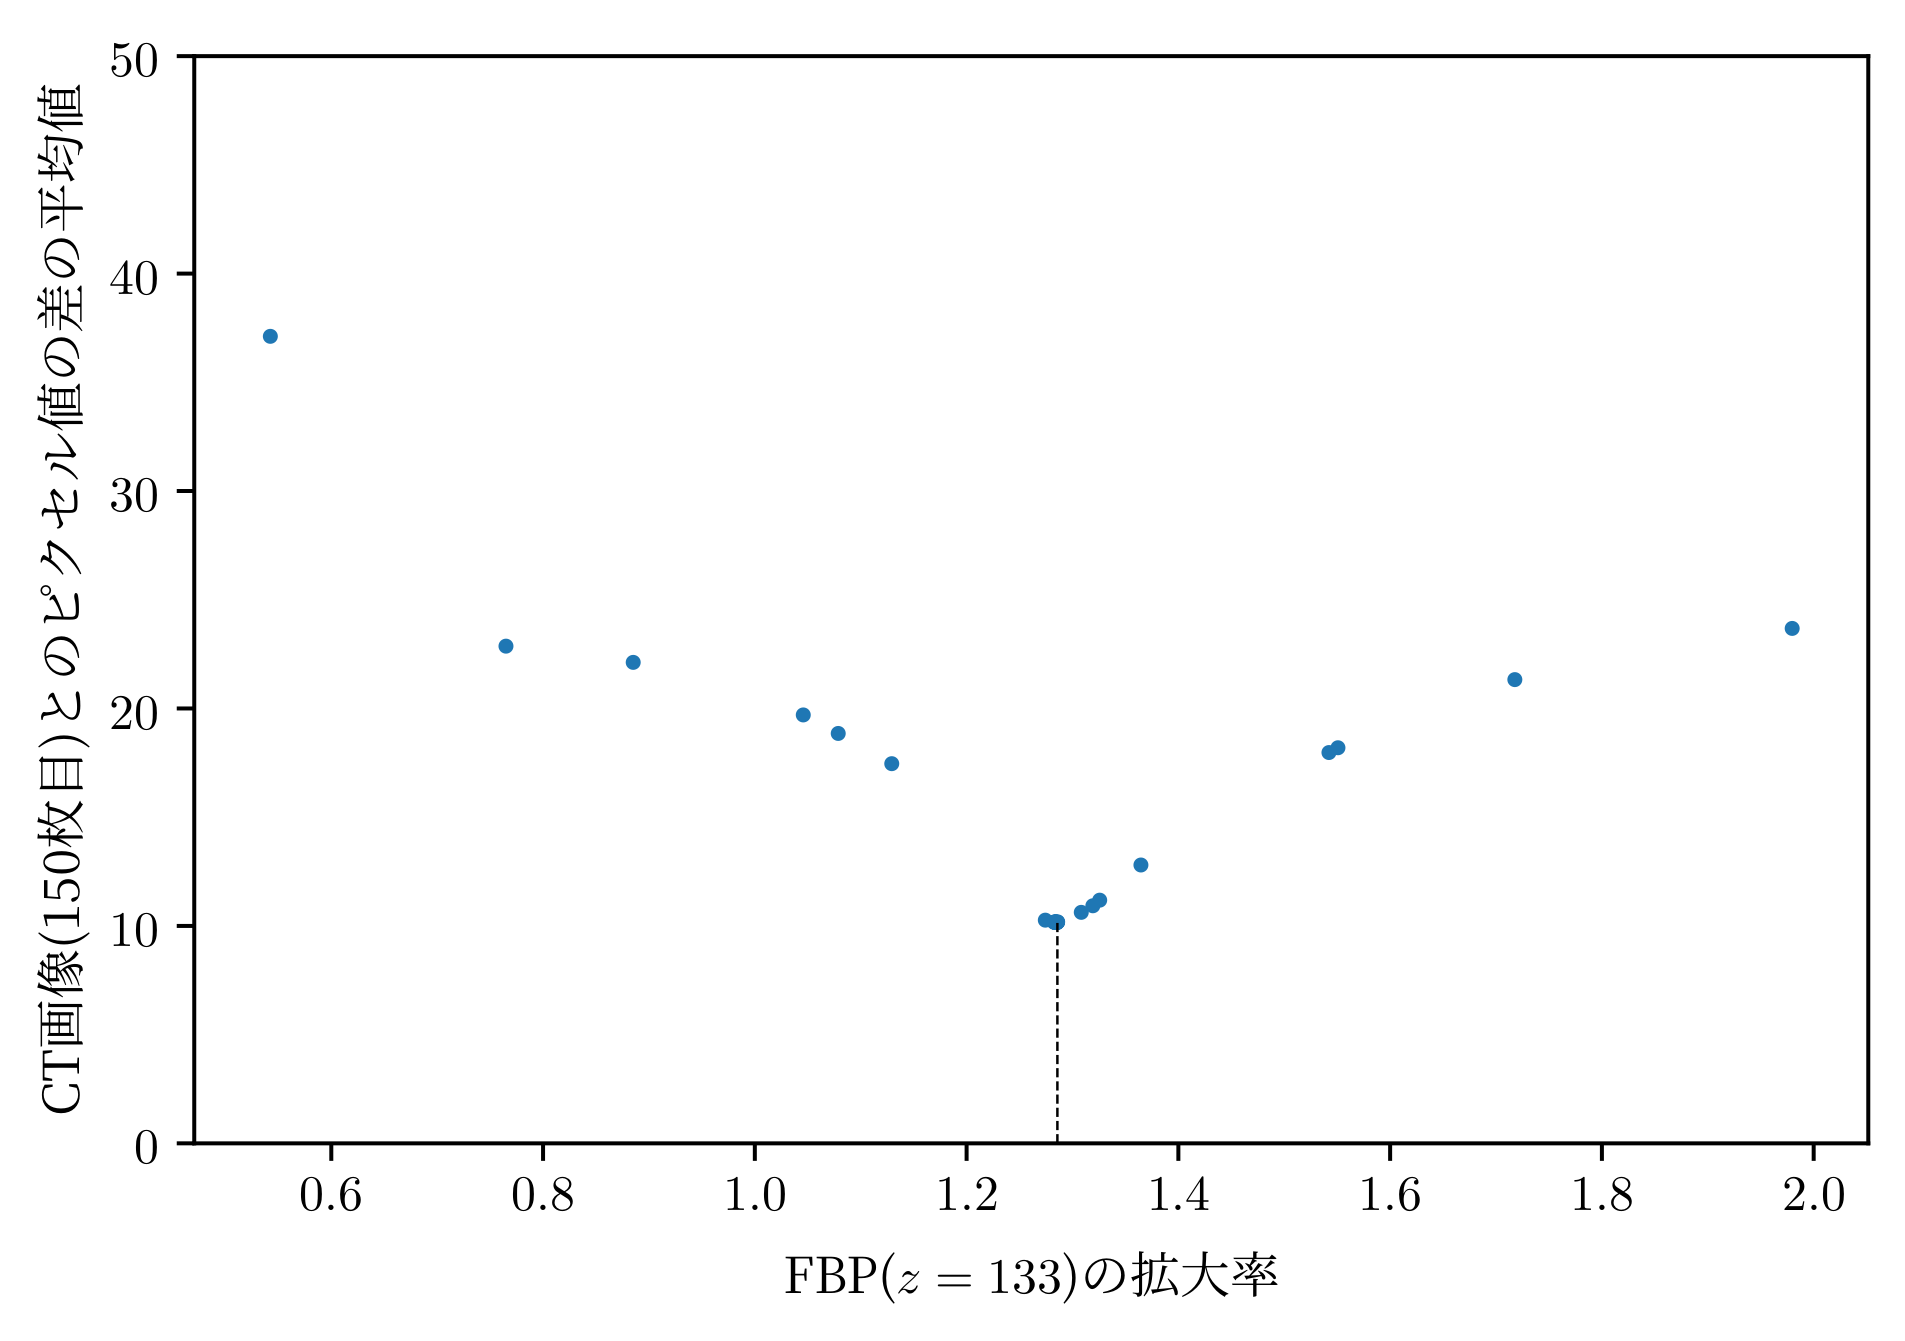

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mlp
import scipy.stats as stats
import cupy as cp

# x, y = p.calculate_resize_data(b)

fig = plt.figure(figsize=(6, 4), dpi=360)

rc('text', usetex=True)
mlp.use('pgf')
mlp.rc('font', family='Noto Serif CJK JP')

plt.scatter(x, y, s=4)
plt.vlines(x=1.2857437310189015, color='black', linestyle='dashed', linewidth=0.5, ymax=10.165, ymin=0)

plt.ylim(0, 50)
plt.xlabel("FBP($z=133$)の拡大率")
plt.ylabel("CT画像(150枚目)とのピクセル値の差の平均値")

plt.savefig("figs/graph/resize.png")

In [3]:
%slack

In [ ]:
import importlib
import imageio.v2 as imageio
from patient import patient
import glob

poss = [50, 100, 150, 200]
vols = ["4404147", "4404366"]

for idx, vol in enumerate(vols):
    p = patient.patient(name=vol)
    for pos in poss:
        imageio.imsave(f"figures/ct_patient{idx}_{pos}.png",
                       cp.asnumpy(p.ct.img[pos]))

# imageio.mimsave(f"pics/drr.gif", p.drr.img)
%slack

In [89]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if ".ttc" in i.fname:
        print(i)

FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc', name='Noto Sans CJK JP', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')
FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc', name='Noto Serif CJK JP', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')
FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc', name='Noto Sans CJK JP', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')
FontEntry(fname='/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc', name='Noto Serif CJK JP', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')


In [174]:
import re
import tqdm
import pandas as pd

df = pd.DataFrame()

with open("pix2pix/checkpoints/ctfbp_pix2pix/loss_log.txt", "r") as f:
    lines = f.read().split("\n")

dat = {}
now = []
title = ""
for line in lines:
# string = "(epoch: 1, iters: 100, time: 0.026, data: 0.174) G_GAN: 1.643 G_L1: 11.627 D_real: 0.185 D_fake: 0.885"
    if "==" in line:
        if title != "":
            dat[title] = now
        now = []
        title = line
        continue
    regex = r"\(epoch: (?P<epoch>\d+), iters: (?P<iters>\d+), time: (?P<time>\d.+), data: (?P<data>\d.+)\) G_GAN: (?P<G_GAN>\d.+) G_L1: (?P<G_L1>\d.+) D_real: (?P<D_real>\d.+) D_fake: (?P<D_fake>\d.+)"
    groups = re.match(regex, line)
    # print(groups.groupdict())
    # df = df.append(groups.groupdict(), ignore_index=True)
    try:
        now.append(groups.groupdict())
    except:
        print(line)

dat[title] = now
# dat.append(now)
# df = pd.DataFrame(dat["================ Training Loss (Mon Jan  9 00:46:24 2023) ================"])
df = pd.DataFrame(dat["================ Training Loss (Mon Jan 30 04:42:58 2023) ================"])
df

,epoch,iters,time,data,G_GAN,G_L1,D_real,D_fake
0,1,100,0.026,0.174,1.643,11.627,0.185,0.885
1,1,200,0.024,0.001,1.003,9.146,1.161,0.177
2,1,300,0.024,0.001,2.227,7.672,0.117,0.724
3,1,400,0.110,0.002,0.282,7.628,1.482,0.337
4,1,500,0.025,0.001,1.465,8.130,0.941,0.095
...,...,...,...,...,...,...,...,...
15295,200,7250,0.066,0.002,3.564,3.252,0.029,0.127
15296,200,7350,0.025,0.001,2.511,4.879,0.101,0.374
15297,200,7450,0.024,0.002,3.836,3.410,0.255,0.089
15298,200,7550,0.025,0.002,4.710,4.387,0.019,0.053


In [175]:
df['epoch'] = df['epoch'].astype(int)
df['iters'] = df['iters'].astype(int)
df['time'] = df['time'].astype(float)
df['data'] = df['data'].astype(float)
df['G_GAN'] = df['G_GAN'].astype(float)
df['G_L1'] = df['G_L1'].astype(float)
df['D_real'] = df['D_real'].astype(float)
df['D_fake'] = df['D_fake'].astype(float)

df['step'] = (df['epoch'] - 1) + df['iters'] / 7650

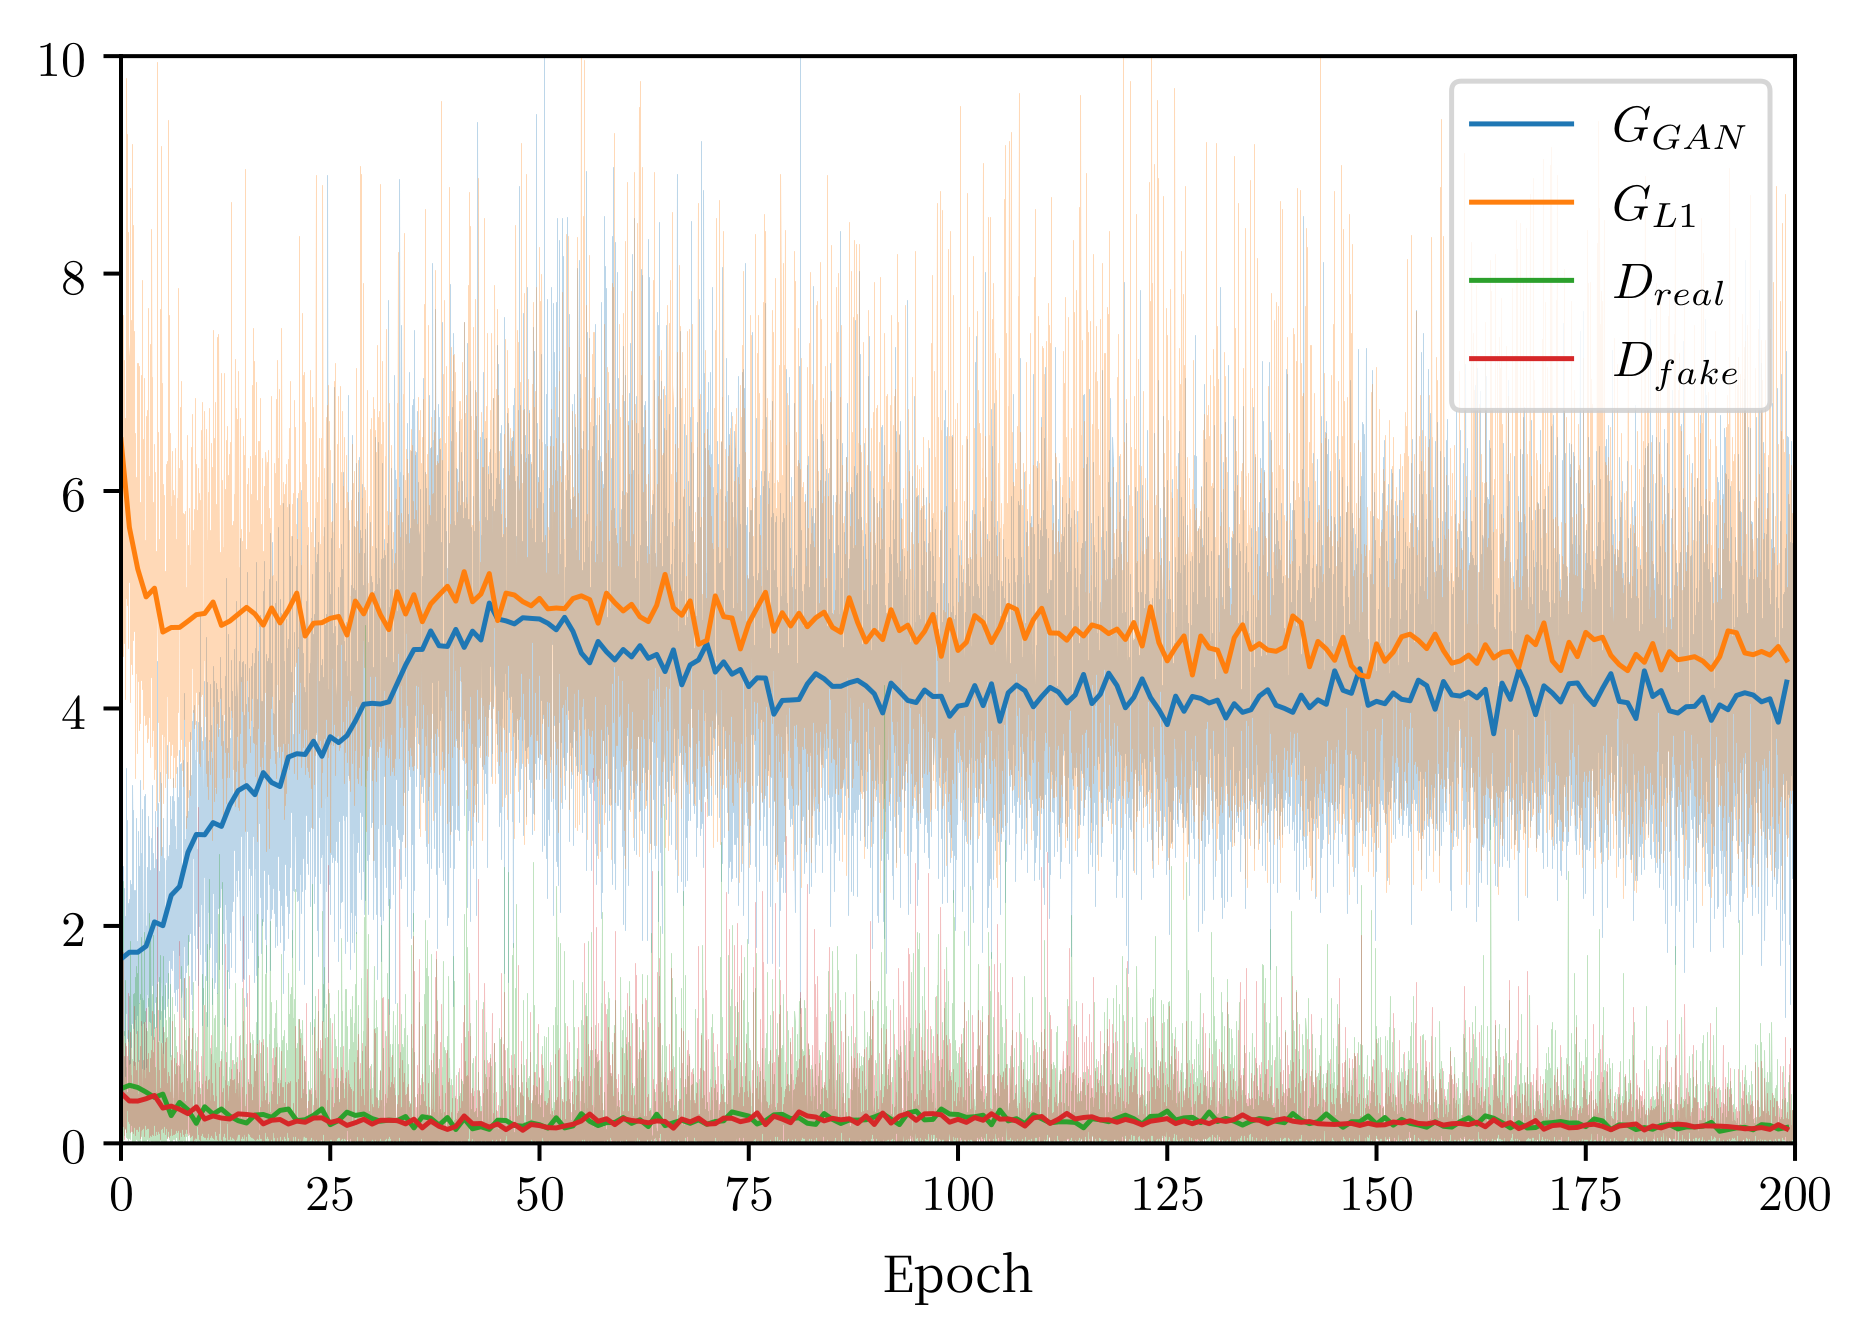

In [176]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mlp

rc('text', usetex=True)
mlp.use('pgf')
mlp.rc('font', family='Noto Serif CJK JP')

fig = plt.figure(figsize=(6, 4), dpi=360)

plt.plot(df['step'], df['G_GAN'], c='C0', linewidth=0.2, alpha=0.3)
plt.plot(df['step'], df['G_L1'], c='C1', linewidth=0.2, alpha=0.3)
plt.plot(df['step'], df['D_real'], c='C2', linewidth=0.2, alpha=0.3)
plt.plot(df['step'], df['D_fake'], c='C3', linewidth=0.2, alpha=0.3)

g_gan = df.groupby('epoch', as_index=False)['G_GAN'].mean()['G_GAN']
g_l1 = df.groupby('epoch', as_index=False)['G_L1'].mean()['G_L1']
d_real = df.groupby('epoch', as_index=False)['D_real'].mean()['D_real']
d_fake = df.groupby('epoch', as_index=False)['D_fake'].mean()['D_fake']

plt.plot(g_gan, c='C0', linewidth=1.0, label=r"$G_{GAN}$")
plt.plot(g_l1, c='C1', linewidth=1.0, label=r"$G_{L1}$")
plt.plot(d_real, c='C2', linewidth=1.0, label=r"$D_{real}$")
plt.plot(d_fake, c='C3', linewidth=1.0, label=r"$D_{fake}$")

plt.ylim(0, 10)
plt.xlim(0, 200)
plt.xlabel("Epoch")

plt.legend(loc='upper right')

plt.savefig("figs/graph/pix2pixloss_adjusted.png")